# Cholesterol data regression model
The data in cholesterol.txt include the total cholesterol levels ($mg//ml$) of 24 patients ($y$) and their age ($x$).
* Plot a scatter plot between $y$ and $x$ and fit a linear regression model to the data.
* Test the hypothesis $H_0$: $\beta_1 = 0$ versus $H_1$: $\beta_1\neq 0 $ and calculate a $0.95$-confidence interval for the parameter of $x$ in the fitted model. How do we interpret $\beta_1$?
* Calculate a $0.95$-confidence interval for the cholesterol levels of a 35 years old patient as well as for the $E(y)$
* Use a graphic normality test and plot the residuals, $e_i$ vs the fitted values $\hat{y}_i$. What can we infer?

(Assignment for the course *Statistical Models* taught by Prof. Chrysseis Caroni, NTUA)

## Import data

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
# clean file structure
try:
    os.mkdir('./data')
except FileExistsError:
    pass

try:
    os.replace('./cholesterol.txt', './data/cholesterol.txt')
except FileNotFoundError:
    pass

In [4]:
df = pd.read_table('./data/cholesterol.txt',delimiter = ' ')
df

,y,x
0,3.5,46
1,4.5,57
2,2.1,22
3,2.5,22
4,2.3,28
5,3.3,29
6,1.9,20
7,3.0,25
8,3.8,43
9,4.6,63


## Histograms

In [5]:
import seaborn as sns

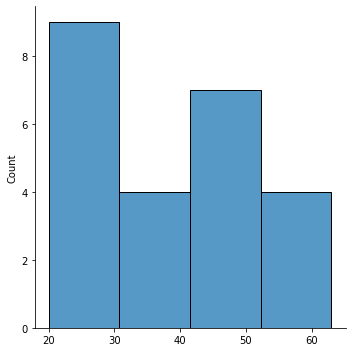

In [6]:
sns.displot(df.x.values, bins = 4)

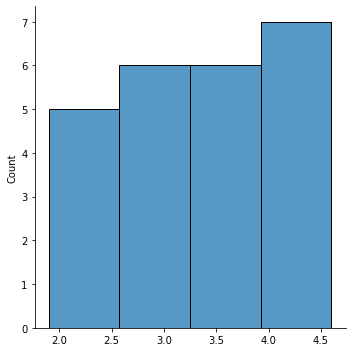

In [7]:
sns.displot(df.y.values, bins = 4)

## Fit a linear model

In [8]:
from sklearn.linear_model import LinearRegression 

In [9]:
model_sklearn = LinearRegression()

In [10]:
X = df.x.values.reshape(-1, 1)
Y = df.y.values.reshape(-1, 1)

In [11]:
model_sklearn.fit(X, Y)

LinearRegression()

## Scatter plot with fitted model

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

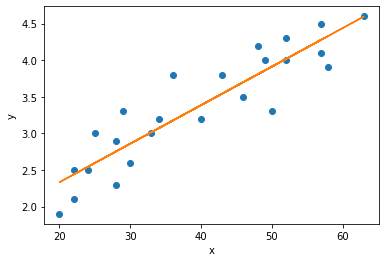

In [13]:
plt.scatter(X, Y)
plt.plot(X, model_sklearn.predict(X) , 'tab:orange')
plt.xlabel('x')
plt.ylabel('y')

In [14]:
model_sklearn.intercept_

array([1.27986835])

In [15]:
model_sklearn.coef_

array([[0.0526249]])

Therefore the fitted model is
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x$$
with parameters:
    $$\hat{\beta}_0 = 1.27986835 $$
    $$\hat{\beta}_1 = 0.0526249 $$

## Hypothesis testing
We set the null and alternative hypotheses as follows.

$H_0$: $\beta_1 = 0$

and

$H_1$: $\beta_1\neq 0$

in order to test whether our model is sufficient.

In [16]:
import statsmodels.api as sm

In [17]:
import numpy as np

In [18]:
# define response variable
y = df.y

# define predictor variables
x = df.x

#add constant to predictor variables
x = sm.add_constant(x.values)
# # alternatively:
# df['const'] = np.ones(len(df))
# x = df[['const', 'x']]

In [19]:
#fit linear regression model
model = sm.OLS(y, x).fit()

In [20]:
#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     102.7
Date:                Tue, 03 May 2022   Prob (F-statistic):           9.43e-10
Time:                        19:23:00   Log-Likelihood:                -6.6945
No. Observations:                  24   AIC:                             17.39
Df Residuals:                      22   BIC:                             19.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2799      0.216      5.934      0.000       0.833       1.727
x1             0.0526      0.005     10.136      0.000       0.042       0.063
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   2.477
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.650
Skew:                          -0.009   Prob(JB):                        0.723
Kurtosis:                       2.194   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the model's summary that the t-value for $\hat{\beta}_1$ is (for $n-2 = 22$ degrees of freedom):

$$t = 10.136$$

and the respective p-value is:

$$P(|t|>10.136) = 2 P(t>10.136) << 0.001$$

which means that we reject $H_0$ and therefore our linear model can describe our data sufficiently.

The model's summary also informs us about the confidence interval for $\hat{\beta}_1$:
$$
0.042 < \hat{\beta}_1 < 0.063
$$

### Model explanation

The value of $\hat{\beta}_1$ shows how $y$ (cholesterol levels) will increase if we increase $x$ (a patient's age) by one. In our case cholesterol levels will increase by $10.136 \,mg/ml$.

 ## A detailed analysis of the hypothesis testing

A more detailed analysis of the hypothesis testing is presented below.

Firstly we compute the following quantities:

$$
\begin{aligned}
    S_{xx} &= \sum_i (x_i - \bar{x})^2\\
    S_{yy} &= \sum_i (y_i - \bar{y})^2\\
    S_{xy} &= \sum_i (x_i - \bar{x})(y_i-\bar{y})
\end{aligned}
$$

In [21]:
Sxx = ((df.x-df.x.mean())**2).sum()

In [22]:
Syy = ((df.y-df.y.mean())**2).sum()

In [23]:
Sxy = ((df.x-df.x.mean())*(df.y-df.y.mean())).sum()

We note that the coefficients of our model are given by the following relationships:
$$
\begin{aligned}
    \hat{\beta}_1 &= \frac{S_{xy}}{S_{xx}}\\
    \hat{\beta}_0 &= \bar{y} - \hat{\beta}_1\cdot \bar{x}
\end{aligned}
$$


In [24]:
beta1_hat = Sxy/Sxx
beta1_hat

0.05262490438423445

In [25]:
beta0_hat = df.y.mean()-beta1_hat*df.x.mean()
beta0_hat

1.279868352188093

Under the assumptions of normal regression analysis
$$
t = \frac{\hat{\beta}_1 - \beta_1}{\hat{\sigma}} \sqrt{\frac{(n-2)S_{xx}}{n}}
$$
is a value of a random variable having the $t$ distribution with $n-2$ degrees of freedom

where $\hat{\sigma}$ is the maximum likelihood estimate of $\sigma$ and is given by:
$$
\begin{aligned}
\hat{\sigma} &= \sqrt{\frac{1}{n}\cdot \sum_i (y_i - \hat{y}_i)^2}\\
             &=\sqrt{\frac{1}{n} \left(S_{yy} - \hat{\beta}_1\cdot S_{xy}\right))}
\end{aligned}
$$


In [26]:
n = 24
sigma_hat = np.sqrt((Syy - beta1_hat*Sxy)/n)
sigma_hat

0.3198182669083327

In [27]:
t_val =  (beta1_hat/sigma_hat) * np.sqrt((n-2)*Sxx/n)
t_val

10.136434125901689

The p-value for the two-tailed test is given by:
$$ 
P(|t|> 10.136) = 2\cdot P(t>10.136) = 9.436\times 10^{-10} << 0.01
$$

In [28]:
from scipy.stats import t

# p-value
2*(1-t.cdf(10.136,n-2))
# # alternatively use:
# 2*t.sf(10.136, df=22)

9.435687786663038e-10

which means that we reject $H_0$ as stated above

##  A detailed analysis of the confidence interval

Under the assumption of normal regression analysis,
$$
\hat{\beta_1} - t_{a/2} \cdot \hat{\sigma}\sqrt{\frac{n}{(n-2)S_{xx}}} < \beta_1 < \hat{\beta_1} + t_{a/2} \cdot \hat{\sigma}\sqrt{\frac{n}{(n-2)S_{xx}}}
$$
is a $(1-a)100\%$ confidence interval for the parameter $\beta_1$

In [29]:
def conf_interv(a, n):
    t_a2 = np.abs(t.ppf(np.abs(a/2),n-2))
    return [beta1_hat - t_a2* sigma_hat*np.sqrt(n/((n-2)*Sxx)), beta1_hat + t_a2* sigma_hat*np.sqrt(n/((n-2)*Sxx))]

# 95% confidence interval
conf_interv(0.05,24) 

[0.041858063644391985, 0.06339174512407691]

## Predictions and confidence intervals

Let us assume a prediction:
$$\hat{y}_0 = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_0$$

We note that the quantity:
$$
t = \frac{\hat{y}_0 - y_0}{\hat{\sigma}\sqrt{\frac{n}{n-2}\left(1+\frac{1}{n}+\frac{(x_0 - \bar{x})^2}{S_{xx}}\right)}}
$$
is a value of a random variable having the $t$-distribution with $n-2$ degrees of freedom

<!-- therefore a confidence interval for the prediction is:
$$
\hat{y}_0 - t_{a/2} \cdot S \cdot \sqrt{\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} < \hat{y}_0 <\hat{y}_0 + t_{a/2} \cdot S \cdot \sqrt{\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)}
$$
where:
$$
\begin{aligned}
& S^2 = \frac{1}{n-2}\sum_i (y_i - \hat{y}_i)^2\\
\Rightarrow & S= \frac{n}{n-2}\hat{\sigma}
\end{aligned}
$$ -->

Therefore the confidence interval for the prediction is (prediction interval):
$$
\hat{y}_0 - t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} < \hat{y}_0 < \hat{y}_0 + t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} 
$$

whereas the confidence interval for the mean response is:
$$
\hat{y}_0 - t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} < \mu_Y < \hat{y}_0 + t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} 
$$

In [30]:
model_sklearn.predict([[35]])

array([[3.12174001]])

In [31]:
def prediction_conf_interv(a, n, model, xpred, data):
    t_a2 = np.abs(t.ppf(a/2,n-2))
    ypred = model.predict([[xpred]])

    return [ypred - t_a2 * sigma_hat * np.sqrt((n/(n-2))*(1+ 1/n + (xpred - data.x.mean())**2/Sxx)),
            ypred + t_a2 * sigma_hat * np.sqrt((n/(n-2))*(1+ 1/n + (xpred - data.x.mean())**2/Sxx))]

In [32]:
def prediction_conf_interv_for_mean(a, n, model, xpred, data):
    t_a2 = np.abs(t.ppf(a/2,n-2))
    ypred = model.predict([[xpred]])

    return [ypred - t_a2 * sigma_hat * np.sqrt((n/(n-2))*(1/n + (xpred - data.x.mean())**2/Sxx)),
            ypred + t_a2 * sigma_hat * np.sqrt((n/(n-2))*(1/n + (xpred - data.x.mean())**2/Sxx))]

In [33]:
prediction_conf_interv(a=0.05, n=24, model=model_sklearn, xpred=35, data = df)

[array([[2.41310246]]), array([[3.83037755]])]

In [34]:
prediction_conf_interv_for_mean(a=0.05, n=24, model=model_sklearn, xpred=35, data = df)

[array([[2.97255028]]), array([[3.27092973]])]

In [35]:
pred = model.get_prediction([[1., 35.]]).summary_frame(alpha=0.05)
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.12174,0.071938,2.97255,3.27093,2.413102,3.830378


which means that a $95\%$ confidence interval for the prediction
$$\hat{y}_0 = 3.12$$
is (prediction interval for $\hat{y}_0$):
$$2.41 < \hat{y}_0 < 3.83$$
and the confidence interval for the mean is:
$$2.97 < \mu_Y < 3.27$$